In [1]:
from IPython.display import Image
Image(filename='/Users/jay/Documents/Frontend/assignment/images/agricultural/agricultural_000001.png')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jay/Documents/Frontend/assignment/images/agricultural/agricultural_000001.png'

In [ ]:
# Quality Enhancement
!pip install pillow

from PIL import Image, ImageEnhance
from IPython.display import display

def enhance_img_quality(image_path1):
    image = Image.open(image_path1)
    display(image) # Display the original image
    factor = 1.2
    # Adjust brightness, contrast and sharpness as needed
    image = ImageEnhance.Brightness(image).enhance(factor)
    image = ImageEnhance.Contrast(image).enhance(factor)
    image = ImageEnhance.Sharpness(image).enhance(factor)

    display(image) # Display the enhanced image

image_path1 = '/Users/jay/Documents/APD3F2311CS(DA)/FYP/assignment/images/overpass/overpass_000006.png'
enhance_img_quality(image_path1)

In [ ]:
# Noise Reduction
import cv2
from IPython.display import display
from PIL import Image as PILImage
import io

def reduce_noise(image_path):
    # Read the image in OpenCV
    img = cv2.imread(image_path)
    if img is not None:
        # Convert the original OpenCV image to RGB and display it
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display_img(img_rgb)
        
        # Apply GaussianBlur to the image
        img_blur = cv2.GaussianBlur(img, (5, 5), 0)
        
        # Convert the blurred image to RGB and display it
        img_blur_rgb = cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB)
        display_img(img_blur_rgb)
    else:
        print("Image not found or the file path is incorrect.")

def display_img(cv_img):
    # Convert the OpenCV image to PIL format
    img_pil = PILImage.fromarray(cv_img)
    
    # Display the image using IPython display
    with io.BytesIO() as buf:
        img_pil.save(buf, format='PNG')
        display(Image(data=buf.getvalue()))

image_path = '/Users/jay/Documents/APD3F2311CS(DA)/FYP/assignment/images/harbor/harbor_000078.png'
reduce_noise(image_path)

In [ ]:
# Consistency
from PIL import Image
from IPython.display import display
import os
import matplotlib.pyplot as plt

def resize_and_compare_images(image_path1, image_path2, desired_size):
    # Open and resize the first image
    img1 = Image.open(image_path1)
    display(img1) # Display the original image
    img1 = img1.resize((desired_size, desired_size), Image.Resampling.LANCZOS)

    # Open and resize the second image
    img2 = Image.open(image_path2)
    display(img2) # Display the original image
    img2 = img2.resize((desired_size, desired_size), Image.Resampling.LANCZOS)

    # Display the resized images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img1)
    axes[0].set_title('Resized Image 1')
    axes[0].axis('off')

    axes[1].imshow(img2)
    axes[1].set_title('Resized Image 2')
    axes[1].axis('off')

    plt.show()

# Example usage
image_path1 = '/Users/jay/Documents/APD3F2311CS(DA)/FYP/assignment/EuroSAT/River/River_1.jpg'
image_path2 = '/Users/jay/Documents/APD3F2311CS(DA)/FYP/assignment/images/river/river_000001.png'
desired_size = 256

resize_and_compare_images(image_path1, image_path2, desired_size)

In [ ]:
# Dimensionality Reduction
from IPython.display import display

def convert_to_grayscale(image_path):
    img = Image.open(image_path)
    display(img)  # Display the original image
    grayscale_img = img.convert('L')  # Convert to grayscale
    display(grayscale_img)

image_path = '/Users/jay/Documents/APD3F2311CS(DA)/FYP/assignment/images/parkinglot/parkinglot_000007.png'
convert_to_grayscale(image_path)

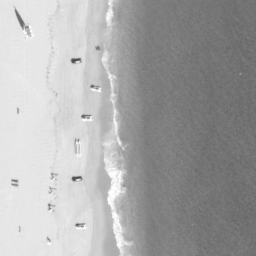

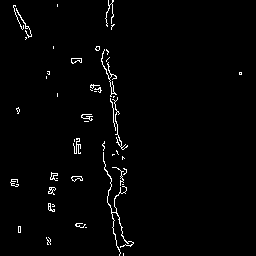

In [1]:
# Feature Highlighting
import cv2
from IPython.display import Image as IPyImage, display
from PIL import Image as PILImage
import numpy as np
import io

# Function to display an image from a NumPy array
def display_image_from_array(array, conversion=None):
    # Convert to RGB if needed
    if conversion is not None:
        array = cv2.cvtColor(array, conversion)
    # Convert the NumPy array to a PIL Image
    image = PILImage.fromarray(array)
    # Display the image
    with io.BytesIO() as buf:
        image.save(buf, format='PNG')
        display(IPyImage(data=buf.getvalue()))

# Feature Highlighting Function
def highlight_features(image_path, threshold1, threshold2):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        # Display the original image
        display_image_from_array(img, conversion=None)
        # Perform Canny edge detection
        edges = cv2.Canny(img, threshold1, threshold2)
        # Display the edges detected
        display_image_from_array(edges, conversion=None)
    else:
        print("Image not found or the file path is incorrect.")

# Set appropriate threshold values
threshold1 = 100
threshold2 = 150

# Replace with the correct path to your image
image_path = '/Users/jay/Documents/APD3F2311CS(DA)/FYP/assignment/images/beach/beach_000027.png'
highlight_features(image_path, threshold1, threshold2)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Data Augmentation
def augment_data(image_directory, num_images):
    datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True
    )

    # Create a generator
    generator = datagen.flow_from_directory(
        image_directory,
        target_size=(256, 256),
        batch_size=32,
        class_mode=None,
        seed=5  # Seed to get reproducible results
    )

    # Generate and display images
    for i in range(num_images):
        # Generate a batch of images
        batch = next(generator)
        
        # Convert the first image to unsigned integers for display
        image = batch[0].astype('uint8')

        # Display the image
        plt.imshow(image)
        plt.axis('off')
        plt.show()

image_directory = '/Users/jay/Documents/APD3F2311CS(DA)/FYP/assignment/images/'
augment_data(image_directory, 3)

In [ ]:
!pip install scikit-learn imbalanced-learn
# Handling Skewness
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from imblearn.over_sampling import RandomOverSampler

# Load images into an array and assign labels
def load_images(image_directory, target_size):
    images = []
    labels = []
    for class_folder_name in os.listdir(image_directory):
        class_folder_path = os.path.join(image_directory, class_folder_name)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                # Read the image
                image = imread(image_path)
                # Resize the image if it is necessary
                image = resize(image, target_size, anti_aliasing=True)
                # Flatten the image to one dimension
                images.append(image.flatten())
                labels.append(class_folder_name)
    return np.array(images), np.array(labels)

# Balance classes
def balance_classes(images, labels):
    ros = RandomOverSampler(random_state=42)
    images_resampled, labels_resampled = ros.fit_resample(images, labels)
    return images_resampled, labels_resampled

image_directory = '/Users/jay/Documents/APD3F2311CS(DA)/FYP/assignment/images/'
target_size = (128, 128)  # Or whatever size your images are
images, labels = load_images(image_directory, target_size)
images_resampled, labels_resampled = balance_classes(images, labels)

# Reshape images back to original shape if necessary
images_resampled = images_resampled.reshape(-1, *target_size, 3) # assuming color images

